Gonna try some regression modeling

Start with decision trees and try different things

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # for classifying
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
# more of where I want to be

In [2]:
# https://www.kaggle.com/c/elo-merchant-category-recommendation/data
data_direc = 'elo-merchant-category-recommendation/'
train_core = pd.read_csv(data_direc+'train.csv')
merchants_data = pd.read_csv(data_direc+'merchants.csv')
histor_trans = pd.read_csv(data_direc+'historical_transactions.csv')
new_merc = pd.read_csv(data_direc+'new_merchant_transactions.csv')
test_core = pd.read_csv(data_direc+'test.csv')

In [39]:
# So, process here should be to make the tree on the simplest set of data, and then add in features
# and see how training changes
# lets try some different depths, I think this is the only hyper parameter

#print(train_core[['feature_1','feature_2']].values)

# simple 
small_train_1 = train_core[['feature_1']].values
small_train_2 = train_core[['feature_1','feature_2']].values
small_train_3 = train_core[['feature_1','feature_2','feature_3']].values
y = train_core['target'].values

X_train_1, X_val_1, y_train, y_val = train_test_split(small_train_3,y,
                                                      random_state=1,test_size=0.25)

In [40]:
simple_tree2 = DecisionTreeRegressor(max_depth=2)
simple_tree3 = DecisionTreeRegressor(max_depth=3)
simple_tree4 = DecisionTreeRegressor(max_depth=5)

simple_tree2.fit(X_train_1,y_train)
simple_tree3.fit(X_train_1,y_train)
simple_tree4.fit(X_train_1,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [41]:
score2 = simple_tree2.score(X_val_1,y_val)
score3 = simple_tree3.score(X_val_1,y_val)
score4 = simple_tree4.score(X_val_1,y_val)

print(score2)
print(score3)
print(score4)

0.0006211134367108961
0.0007164805548559583
0.0006915538079952377


In [36]:
# I should start adding columns ot the training set bit by bit
# total number of transactions made, average amount spent per transaction, total amount spent
# min and max spent might also be good numbers

# just placed the modified data lower so I don't have to remake it each time

#modified_train_data = train_core[['card_id','first_active_month','feature_1','feature_2','feature_3']]
#modified_train_data['total_num_transactions'] = 0
#modified_train_data['total_spent'] = 0
#modified_train_data['avg_spent_per_transaction'] = 0
#modified_train_data.head()

,card_id,first_active_month,feature_1,feature_2,feature_3
0,C_ID_92a2005557,2017-06,5,2,1
1,C_ID_3d0044924f,2017-01,4,1,0
2,C_ID_d639edf6cd,2016-08,2,2,0
3,C_ID_186d6a6901,2017-09,4,3,0
4,C_ID_cdbd2c0db2,2017-11,1,3,0


In [32]:
# this is a testing cell to become familiar with groupby and agg methods
# still need to look at what agg does

num_trans = 0
tot_spent = 0

print('training data shape = ',train_core.shape)
print('testing data shape = ',test_core.shape)

#histor_trans.groupby(['card_id']).mean()['purchase_amount'].head()
# histor_trans.groupby(['card_id']).mean().head()

#print(histor_trans.groupby(['card_id']).mean()['purchase_amount'])
#print(histor_trans.groupby(['card_id']).sum()['purchase_amount'])

#print(modified_train_data['card_id'])




training data shape =  (201917, 6)
testing data shape =  (123623, 5)


In [3]:
# a multi index frame might also be helpful
modified_train_data = train_core[['card_id','first_active_month','feature_1','feature_2','feature_3','target']]
# modified_train_data['total_num_transactions'] = histor_trans.groupby()
modified_train_data = pd.merge(left=modified_train_data,
                               right=histor_trans.groupby(['card_id']).mean()['purchase_amount'],
                               how='inner',on='card_id')
modified_train_data = modified_train_data.rename(columns={'purchase_amount':'avg_purchase_amount'})

modified_train_data = pd.merge(left=modified_train_data,
                               right=histor_trans.groupby(['card_id']).sum()['purchase_amount'],
                               how='inner',on='card_id')
modified_train_data = modified_train_data.rename(columns={'purchase_amount':'total_purchase_amount'})

# modified_train_data = modified_train_data.drop()

modified_train_data.head()

,card_id,first_active_month,feature_1,feature_2,feature_3,target,avg_purchase_amount,total_purchase_amount
0,C_ID_92a2005557,2017-06,5,2,1,-0.820283,-0.638341,-165.968739
1,C_ID_3d0044924f,2017-01,4,1,0,0.392913,-0.600018,-210.006336
2,C_ID_d639edf6cd,2016-08,2,2,0,0.688056,-0.678311,-29.167391
3,C_ID_186d6a6901,2017-09,4,3,0,0.142495,-0.642745,-49.491364
4,C_ID_cdbd2c0db2,2017-11,1,3,0,-0.159749,-0.366073,-48.687656


[ 0.08254619 -0.09918572 -0.37769637 ... -0.67639611 -0.32187134
 -0.44488068]
[ 0.30070305  0.86059694 -0.20388935 ...  0.07368348  0.95833898
  1.06200375]
[-0.32187134 -0.33527086 -1.50979404 ... -0.11530731 -0.12661377
 -0.44488068]
[-1.22869149  0.40463941 -5.184915   ...  1.75391175 -0.02217745
  0.65220953]


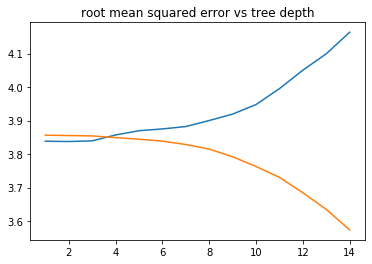

In [4]:
# split data here
y = modified_train_data['target'].values
modded_vals_nums = modified_train_data.drop('card_id',axis=1)
modded_vals_nums = modded_vals_nums.drop('target',axis=1)
modded_vals_nums = modded_vals_nums.drop('first_active_month',axis=1).values
X_train, X_val, y_train, y_val = train_test_split(modded_vals_nums,y,
                                                      random_state=4,test_size=0.40)


num_sim_trees = 15
sim_tree_arr = [DecisionTreeRegressor(max_depth=i) for i in range(1,num_sim_trees)]
for i in range(0,num_sim_trees-1):
    sim_tree_arr[i].fit(X_train,y_train)


predictions_sim_tree = np.array([sim_tree_arr[i].predict(X_val) for i in range(0,num_sim_trees-1)])
predictions_sim_tree_train = np.array([sim_tree_arr[i].predict(X_train) for i in range(0,num_sim_trees-1)])

print(predictions_sim_tree[10])
print(y_val)

print(predictions_sim_tree_train[10])
print(y_train)

rmse_sim_tree = np.sqrt([mean_squared_error(predictions_sim_tree[i],y_val) for i in range(0,num_sim_trees-1)])
rmse_sim_tree_train = np.sqrt([mean_squared_error(predictions_sim_tree_train[i],
                                                  y_train) for i in range(0,num_sim_trees-1)])

num_tree_depth = np.linspace(1,num_sim_trees-1,num=num_sim_trees-1)
plt.plot(num_tree_depth,rmse_sim_tree)
plt.plot(num_tree_depth,rmse_sim_tree_train)
plt.title('root mean squared error vs tree depth')
plt.show()

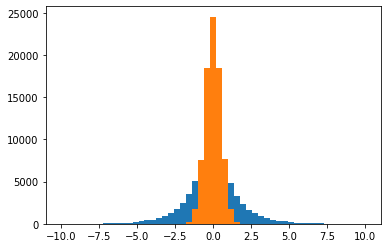

3.8889273028541385


In [7]:
# lets fit a gaussian, pull a set of random numbers, and then calculate rmse
# well, fit a gaussian to the training target, and then pull, worth a shot
mu, std = norm.fit(y_train)
#print(mu,std)
gauss_predict = np.random.normal(loc=mu,scale=std,size=y_val.__len__())
gauss_predict = np.random.normal(loc=0,scale=0.5,size=y_val.__len__())
plt.hist(y_val,range=(-10,10),bins=51)
plt.hist(gauss_predict,range=(-10,10),bins=51)
plt.show()
gauss_rmse = np.sqrt(mean_squared_error(gauss_predict,y_val))
print(gauss_rmse)

In [ ]:
print('stuff')

#for iden in modified_train_data['card_id']:
    #print(iden)
checker = modified_train_data['card_id'][0]
checker = train_core['card_id'][100]
#print(checker)
print(modified_train_data['card_id'].str.find(checker).values)
#data_testing['purcha'] = 
